# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from keras.layers import (
    Dense, 
    Dropout, 
    Flatten,
    Conv2D, 
    MaxPooling2D
)

# Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images[0].shape)
print(train_images.shape)

(28, 28)
(60000, 28, 28)


In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='Count'>

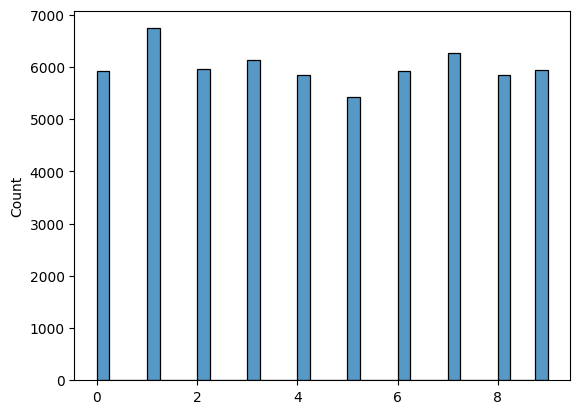

In [4]:
sns.histplot(train_labels)

In [8]:
train_images = train_images / 255
test_images = test_images / 255

# Reshape to create extra dim (1) to be size of color depth of the pixel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:

def build_model(optimiser):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(
            input_shape=(28,28,1), 
            activation='relu',
            kernel_size=3, 
            filters=16
        ),
        tf.keras.layers.MaxPool2D(
            pool_size=(2,2)
        ),
        tf.keras.layers.Dropout(0.25), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimiser,
        metrics=['accuracy']
    )
    return model

# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
# for i in optimizers:
#     model = build_model(i)
#     hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

model = build_model('Adam')


In [11]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [12]:
history = model.fit( train_images, train_labels, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4250 - loss: 1.6748 - val_accuracy: 0.8840 - val_loss: 0.4044
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8496 - loss: 0.4941 - val_accuracy: 0.9123 - val_loss: 0.3012
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8802 - loss: 0.4027 - val_accuracy: 0.9222 - val_loss: 0.2664
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8920 - loss: 0.3555 - val_accuracy: 0.9328 - val_loss: 0.2274
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9054 - loss: 0.3138 - val_accuracy: 0.9388 - val_loss: 0.2050
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9139 - loss: 0.2861 - val_accuracy: 0.9435 - val_loss: 0.1918
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9170 - loss: 0.2709 - val_accuracy: 0.9448 - val_loss: 0.1823
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9209 - loss: 0

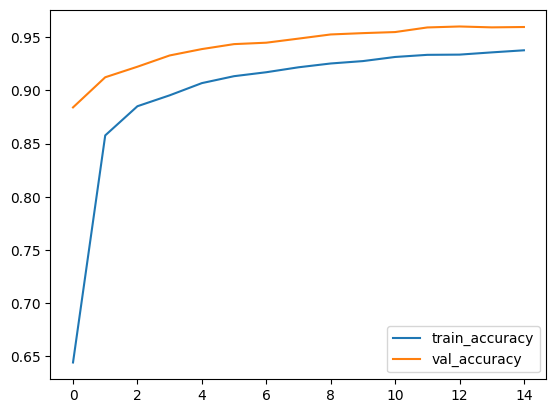

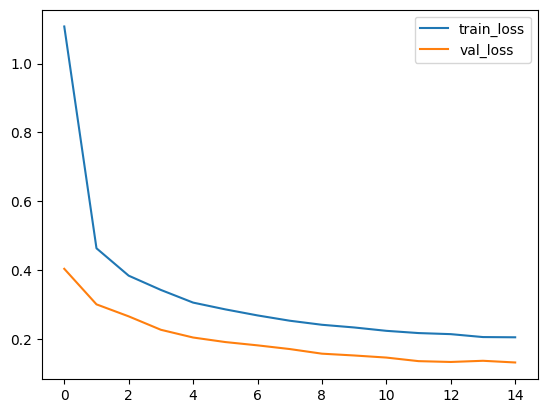

In [13]:

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [17]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
model.predict(train_images[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[4.01655820e-09, 1.21167650e-05, 3.15779198e-06, 1.50499627e-01,
        1.44779937e-14, 8.49342704e-01, 1.62386415e-09, 4.32872696e-07,
        1.13609406e-06, 1.40915232e-04],
       [9.99971867e-01, 2.71635336e-09, 2.59745811e-05, 5.89407421e-07,
        4.17223222e-13, 4.41149496e-07, 2.32329597e-07, 1.47818298e-07,
        2.70003664e-08, 7.70344570e-07],
       [1.45415277e-06, 8.73239242e-06, 3.88032314e-03, 1.68267116e-02,
        9.36227918e-01, 1.12708556e-04, 9.74083741e-05, 2.37566326e-02,
        1.12320129e-04, 1.89757701e-02]], dtype=float32)

# Test

In [18]:
test_images.shape

(10000, 28, 28, 1)

In [19]:
score = model.evaluate( test_images, test_labels )
print(f"Test accuracy: {score[1]:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9525 - loss: 0.1508
Test accuracy: 0.958


In [20]:
# # We can also load some custom images to test

def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	# data = list(img.getdata())
	# print(type(data))
	img = np.array(img)
	data = img.reshape(28,28,1)
	print(data.shape)
	data = img
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

(28, 28, 1)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None